In [10]:
%run Make_Question_simplified.ipynb
import numpy as np
from collections import defaultdict

import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import time
import csv

from collections import defaultdict

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import networkx as nx
import numpy as np

import dwave.inspector
import dimod

import matplotlib

from matplotlib import pyplot as plt


In [11]:
N = 2
#M = 5
I = 2
J = 2
K = 4
Data_upperbound = 20
Processing_upperbound = 20
Data_input = Data_Queue(I,J,Data_upperbound)
Data_input_type = Data_Queue_type(I,J,K)
VM_type = VM_Data_type_gen(I,K,N)

VM_speed = VM_Data_processing_speed(Processing_upperbound, VM_type, K)
VM_DP_time = VM_Data_processing_time(Data_input, Data_input_type , VM_speed)

modified_VM_DP_time =np.copy(VM_DP_time)
modified_VM_DP_time[np.isinf(modified_VM_DP_time)]=np.inf



In [12]:
T_max_true = little_greedy_algorithm(VM_DP_time,I,J,N)
print(VM_type)
print(Data_input_type)
print(VM_DP_time)
#print(np.min(VM_DP_time.reshape(I*J,N),1))
T_max= T_max_true + 1
#T_max += 1
print("T_max is ",T_max_true)
#print("let t = 1 unit of time")

[[1 2 4]
 [1 2 3]]
[[1 3]
 [3 4]]
[[[ 1.  1.]
  [inf  1.]]

 [[inf  1.]
  [ 2. inf]]]
T_max is  6


z_0110
z_1100


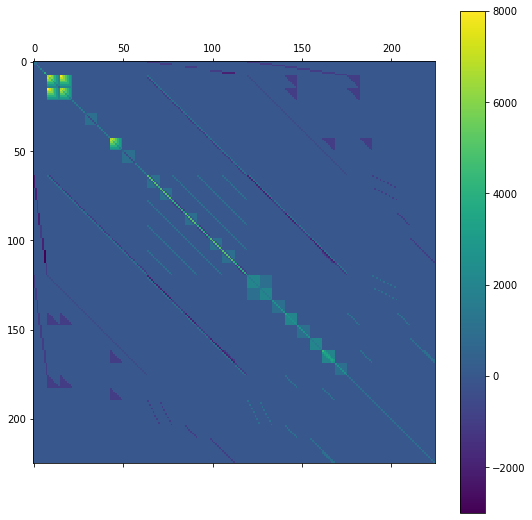

In [13]:
position_dictionary, Total = Make_dictionary(I,J,N,T_max)
QUBO_init = np.zeros((Total, Total))
P = {
    "Obj": 1,
    "C1":  1000,
    "C2":  1000,
    "C3":  1000,
    "C4":  1000,
    "C5":  1000,
    "C6":  1000,
    "C7":  1000,
    "C8":  1000,
    "C9":  1000,
    "Cadd":  1000,
    "Cadd1":  1000,
    "Cadd2":  1000,
    "Caddz":  1000,
}
QUBO_0 = mk_QUBO_0(I,J,N,T_max,QUBO_init,P)
QUBO_1 = mk_QUBO_1(I,J,N,T_max,QUBO_init,VM_type,Data_input_type,position_dictionary,P)
QUBO_2 = mk_QUBO_2(I,J,N,T_max,QUBO_init,VM_type,Data_input_type,position_dictionary,P)
QUBO_3 = mk_QUBO_3(I,J,N,T_max,QUBO_init,VM_type,Data_input_type,position_dictionary,P)
QUBO_4 = mk_QUBO_4(I,J,N,T_max,QUBO_init,VM_type,Data_input_type,position_dictionary,P)
QUBO_5 = mk_QUBO_5(I,J,N,T_max,QUBO_init,VM_type,Data_input_type,position_dictionary,modified_VM_DP_time,P)
QUBO_6 = mk_QUBO_6(I,J,N,T_max,QUBO_init,VM_type,Data_input_type,position_dictionary,modified_VM_DP_time,P)
QUBO_7 = mk_QUBO_7(I,J,N,T_max,QUBO_init,VM_type,Data_input_type,position_dictionary,modified_VM_DP_time,P)
#QUBO_8 = mk_QUBO_8(I,J,N,T_max,QUBO_init,VM_type,Data_input_type,position_dictionary,modified_VM_DP_time,P)
QUBO_add = mk_QUBO_add(I,J,N,T_max,QUBO_init,VM_type,Data_input_type,position_dictionary,modified_VM_DP_time,P)

QUBO_add_1 = mk_QUBO_add_1(I,J,N,T_max,QUBO_init,VM_type,Data_input_type,position_dictionary,modified_VM_DP_time,P)
QUBO_add_2 = mk_QUBO_add_2(I,J,N,T_max,QUBO_init,VM_type,Data_input_type,position_dictionary,modified_VM_DP_time,P)

QUBO_add_z = mk_QUBO_add_z(I,J,N,T_max,QUBO_init,VM_type,Data_input_type,position_dictionary,modified_VM_DP_time,P)

QUBO = np.zeros_like(QUBO_init)
QUBO = QUBO_0 * P['Obj'] + QUBO_add + QUBO_1 + QUBO_2 + QUBO_3 + QUBO_4 + QUBO_5 + QUBO_6 + QUBO_7 + QUBO_add_z + QUBO_add_1 + QUBO_add_2# + QUBO_8
#show_graph(QUBO) 
#print(len(position_dictionary))
QUBO,position_dictionary = mk_QUBO_8_alt(I,J,N,T_max,QUBO,VM_type,Data_input_type,position_dictionary,modified_VM_DP_time,P)
#print(len(position_dictionary),np.shape(QUBO))
QUBO,position_dictionary = mk_QUBO_9_alt(I,J,N,T_max,QUBO,VM_type,Data_input_type,position_dictionary,modified_VM_DP_time,P)
#print(len(position_dictionary),np.shape(QUBO))


show_graph(QUBO) 

In [14]:
size,_ = np.shape(QUBO)
if size> 270:
    print("warning, QUBO is too big",size)

In [22]:
from dwave.system import LeapHybridSampler


width,height = np.shape(QUBO)

QUBO_dictionary = defaultdict(int)
for i in range(width):
    for j in range(height):
        QUBO_dictionary[(i,j)] = QUBO[i,j]
        
#sampler = EmbeddingComposite(DWaveSampler(solver={'qpu': True}))
#sampler = EmbeddingComposite(DWaveSampler())
# Select a solver
sampler = LeapHybridSampler()

num_reads = 10000
#sampleset = sampler.sample_qubo(QUBO, chain_strength = 8, num_reads=num_reads)
#sampleset = sampler.sample_qubo(QUBO, num_reads=num_reads)
sampleset = sampler.sample_qubo(QUBO)


#sample = sampleset.first.sample
#energy = sampleset.first.energy
#print(sample,energy)
OP = sampleset.to_pandas_dataframe()
import pandas as pd

OP = OP.sort_values("energy")
OP_final = OP.to_numpy()

rank = 0


OP_opt = OP_final[rank,:].flatten()
sample = OP_opt.astype(int)


%run Make_Question_simplified.ipynb
#dir(sampleset)
print("Constraint_1: ",check_C1 (position_dictionary,sample,I,J,VM_type,Data_input_type))
print("Constraint_2: ",check_C2 (position_dictionary,sample,I,J,N,T_max))
print("Constraint_3: ",check_C3 (position_dictionary,sample,I,J,N,T_max))
print("Constraint_4: ",check_C4 (position_dictionary,sample,I,J,N,T_max))
print("Constraint_5: ",check_C5 (position_dictionary,sample,I,J,VM_type,Data_input_type,T_max,modified_VM_DP_time))
print("Constraint_6: ",check_C6 (position_dictionary,sample,I,J,N,T_max))
print("Constraint_7: ",check_C7 (position_dictionary,sample,I,J,N,T_max))
print("Constraint_8: ",check_C8_alt(position_dictionary,sample,I,J,VM_type,Data_input_type,T_max,modified_VM_DP_time))
print("Constraint_9: ",check_C9 (position_dictionary,sample,I,J,VM_type,Data_input_type,T_max,modified_VM_DP_time))
print("Constraint_add: ",check_C_add(position_dictionary,sample,I,J,N,VM_type,Data_input_type,T_max))
print("Constraint_add_p: ",check_C_add_1(position_dictionary,sample,I,J,N,T_max))

print("Constraint_add_z: ",check_C_add_2(position_dictionary,sample,I,J,N,T_max))

Constraint_1:  True
Constraint_2:  True
Constraint_3:  True
Constraint_4:  True
Constraint_5:  True
Constraint_6:  True
Constraint_7:  True
Constraint_8:  True
Constraint_9:  True
Constraint_add:  True
Constraint_add_p:  True
Constraint_add_z:  True


In [23]:
#OP

In [32]:
sampleset.info['qpu_access_time']
sampleset.info

{'qpu_access_time': 65920,
 'charge_time': 2986719,
 'run_time': 2986719,
 'problem_id': '00181218-6934-40a1-a15b-59c0b91939ec'}

In [27]:
getattr(sampleset,'name')

AttributeError: 'SampleSet' object has no attribute 'name'

In [19]:
for m in range(N):
    for t in range(T_max):
        start = np.zeros((I,J))
        work = np.zeros((I,J))
        end = np.zeros((I,J))
        for i in range(I):
            for j in range(J):
                #print('p_%d%d%d%d value:'%(i,J-1,m,t), sample[position_dictionary['p_%d%d%d%d'%(i,J-1,m,t)]])
            
                start[i,j] = sample[position_dictionary['z_%d%d%d%d'%(i,j,m,t)]] 
                work[i,j] = sample[position_dictionary['y_%d%d%d%d'%(i,j,m,t)]] 
                end[i,j] = sample[position_dictionary['p_%d%d%d%d'%(i,j,m,t)]] 
        people,index = np.where(work == 1)
        start,index_s = np.where(start == 1)
        end,index_e = np.where(end == 1)
        if len(people) > 0:      
#            if len(start) > 0:
#                print("when t = ", t ,": the machine", m ,"is starting", start[0],"th people's", index_s[0], "th workload.")
#            else:
                print("when t = ", t ,": the machine", m ,"is working on", people[0],"th people's", index[0], "th workload.","Function type", Data_input_type[people[0],index[0]])   
        elif len(end) > 0:
            print("when t = ", t ,": the machine", m ,"is ending", end[0],"th people's", index_e[0], "th workload.")

            
        else:
            print("when t = ", t ,": the machine", m ,"is hanging up")
            
    print("-----------------------------------------------------------------------")
    
opt_time = 0
for i in range(I):    
    for m in range(N):
        for t in range(T_max):
            #print('p_%d%d%d%d value:'%(i,J-1,m,t), sample[position_dictionary['p_%d%d%d%d'%(i,J-1,m,t)]])
            #print(t * sample[position_dictionary['p_%d%d%d%d'%(i,J-1,m,t)]],'p_%d%d%d%d'%(i,J-1,m,t))
            opt_time += t * sample[position_dictionary['p_%d%d%d%d'%(i,J-1,m,t)]]
            


print("The opt_time is: ", opt_time)
print("the greedy time is: ", T_max_true)

when t =  0 : the machine 0 is hanging up
when t =  1 : the machine 0 is working on 1 th people's 1 th workload. Function type 4
when t =  2 : the machine 0 is working on 1 th people's 1 th workload. Function type 4
when t =  3 : the machine 0 is ending 1 th people's 1 th workload.
when t =  4 : the machine 0 is hanging up
when t =  5 : the machine 0 is hanging up
when t =  6 : the machine 0 is hanging up
-----------------------------------------------------------------------
when t =  0 : the machine 1 is working on 1 th people's 0 th workload. Function type 3
when t =  1 : the machine 1 is working on 0 th people's 0 th workload. Function type 1
when t =  2 : the machine 1 is working on 0 th people's 1 th workload. Function type 3
when t =  3 : the machine 1 is ending 0 th people's 1 th workload.
when t =  4 : the machine 1 is hanging up
when t =  5 : the machine 1 is hanging up
when t =  6 : the machine 1 is hanging up
-----------------------------------------------------------------

In [360]:
p_ = np.zeros((I,J,N,T_max))
for i in range(I):    
    for j in range(J):  
        for m in range(N):
            for t in range(T_max):
                p_[i,j,m,t] = sample[position_dictionary['p_%d%d%d%d'%(i,j,m,t)]]
_,_,_,time_final = np.where(p_)
QUBO_time = np.max(time_final)
print(QUBO_time )

5


In [361]:
OP

,0,1,2,3,4,5,6,7,8,9,...,272,273,274,275,276,277,278,279,energy,num_occurrences
0,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,-92104.0,1


In [362]:
#sampleset
answer = np.array(sample)

#print(answer.dtype,answer)
import os
attempt = 1
try:
    os.mkdir("Example_I%d_J%d_N%d_ex%d"%(I,J,N,attempt))    
except:
    print("error")
print('Example_I%d_J%d_N%d_ex%d/Data_input'%(I,J,N,attempt))


error
Example_I2_J2_N2_ex1/Data_input


In [363]:
np.save('Example_I%d_J%d_N%d_ex%d/Data_input'%(I,J,N,attempt), Data_input)
np.save('Example_I%d_J%d_N%d_ex%d/Data_input_type'%(I,J,N,attempt), Data_input_type )
np.save('Example_I%d_J%d_N%d_ex%d/VM_type'%(I,J,N,attempt), VM_type)
np.save('Example_I%d_J%d_N%d_ex%d/VM_speed'%(I,J,N,attempt), VM_speed)
np.save('Example_I%d_J%d_N%d_ex%d/T_max_true'%(I,J,N,attempt), T_max_true)
np.save('Example_I%d_J%d_N%d_ex%d/QUBO_time'%(I,J,N,attempt), QUBO_time)
np.save('Example_I%d_J%d_N%d_ex%d/opt_time'%(I,J,N,attempt), opt_time)
np.save('Example_I%d_J%d_N%d_ex%d/opt_time_divide_N'%(I,J,N,attempt), opt_time/N)
np.save('Example_I%d_J%d_N%d_ex%d/answer'%(I,J,N,attempt), answer)
np.save('Example_I%d_J%d_N%d_ex%d/VM_speed'%(I,J,N,attempt), VM_speed)
np.save('Example_I%d_J%d_N%d_ex%d/VM_DP_time'%(I,J,N,attempt), VM_DP_time)
OP.to_csv('Example_I%d_J%d_N%d_ex%d/answer_pandas.csv'%(I,J,N,attempt),index=False)
np.save('Example_I%d_J%d_N%d_ex%d/P'%(I,J,N,attempt), P)
np.save('Example_I%d_J%d_N%d_ex%d/QUBO'%(I,J,N,attempt), QUBO)


In [ ]:
#import numpy as np

# Save
#dictionary = {'hello':'world'}
#np.save('my_file.npy', dictionary) 

# Load
#read_dictionary = np.load('my_file.npy',allow_pickle='TRUE').item()
#print(read_dictionary['hello']) # displays "world"

In [626]:
for m in range(N):
    print("Machine",m)
    for t in range(T_max):
        for i in range(I):
            
            for j in range(J):        
                print("t = ",t,' z_%d%d value:'%(i,j), sample[position_dictionary['z_%d%d%d%d'%(i,j,m,t)]],' y_%d%d value:'%(i,j), sample[position_dictionary['y_%d%d%d%d'%(i,j,m,t)]],' p_%d%d value:'%(i,j), sample[position_dictionary['p_%d%d%d%d'%(i,j,m,t)]])


Machine 0
t =  0  z_00 value: 0  y_00 value: 0  p_00 value: 0
t =  0  z_01 value: 0  y_01 value: 0  p_01 value: 0
t =  0  z_10 value: 0  y_10 value: 0  p_10 value: 0
t =  0  z_11 value: 0  y_11 value: 0  p_11 value: 0
t =  1  z_00 value: 0  y_00 value: 0  p_00 value: 0
t =  1  z_01 value: 1  y_01 value: 1  p_01 value: 0
t =  1  z_10 value: 0  y_10 value: 0  p_10 value: 0
t =  1  z_11 value: 0  y_11 value: 0  p_11 value: 0
t =  2  z_00 value: 0  y_00 value: 0  p_00 value: 0
t =  2  z_01 value: 0  y_01 value: 1  p_01 value: 0
t =  2  z_10 value: 0  y_10 value: 0  p_10 value: 0
t =  2  z_11 value: 0  y_11 value: 0  p_11 value: 0
t =  3  z_00 value: 0  y_00 value: 0  p_00 value: 0
t =  3  z_01 value: 0  y_01 value: 0  p_01 value: 1
t =  3  z_10 value: 0  y_10 value: 0  p_10 value: 0
t =  3  z_11 value: 1  y_11 value: 1  p_11 value: 0
t =  4  z_00 value: 0  y_00 value: 0  p_00 value: 0
t =  4  z_01 value: 0  y_01 value: 0  p_01 value: 0
t =  4  z_10 value: 0  y_10 value: 0  p_10 value: 0
t 

p_0100 value: 0
p_0101 value: 0
p_0102 value: 0
p_0103 value: 0
p_0104 value: 1
p_0105 value: 0
p_0110 value: 0
p_0111 value: 0
p_0112 value: 0
p_0113 value: 0
p_0114 value: 0
p_0115 value: 0
p_1100 value: 0
p_1101 value: 0
p_1102 value: 1
p_1103 value: 0
p_1104 value: 0
p_1105 value: 0
p_1110 value: 0
p_1111 value: 0
p_1112 value: 0
p_1113 value: 0
p_1114 value: 0
p_1115 value: 0
The opt_time is:  6
the greedy time is:  6
